In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data <- read.csv("abc.csv")

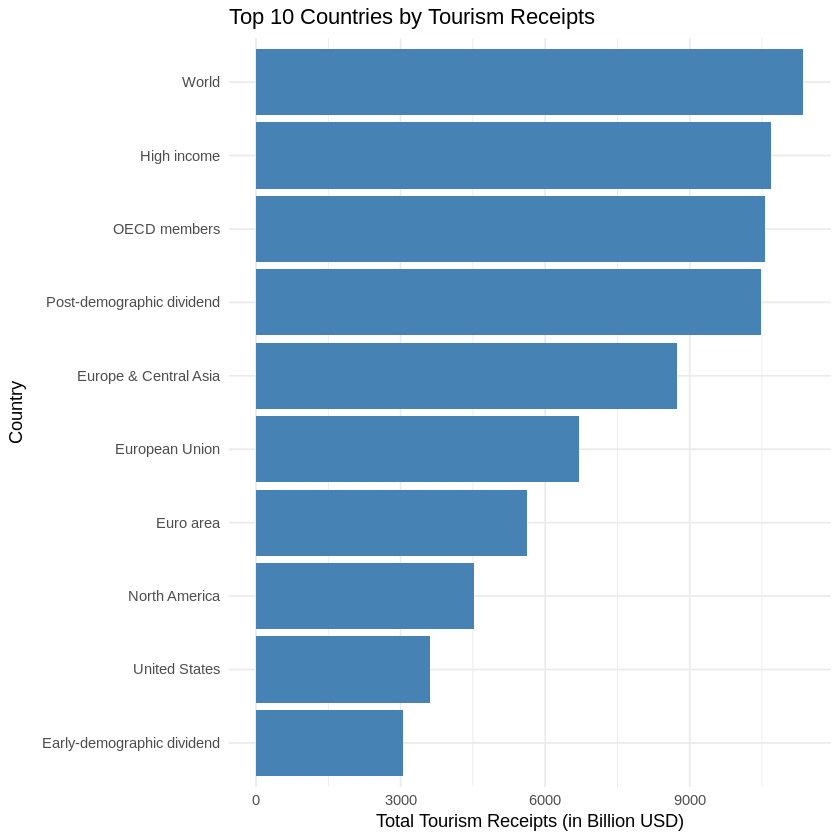

In [ ]:
# 1. Bar Graph: Total Tourism Receipts by Country
bar_data <- data %>%
  group_by(country) %>%
  summarise(total_receipts = sum(tourism_receipts, na.rm = TRUE)) %>%
  arrange(desc(total_receipts)) %>%
  slice_head(n = 10)  # Top 10 countries

# Convert total_receipts to billions for better readability
bar_data$total_receipts <- bar_data$total_receipts / 1e9

ggplot(bar_data, aes(x = reorder(country, total_receipts), y = total_receipts)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal() +
  labs(title = "Top 10 Countries by Tourism Receipts",
       x = "Country",
       y = "Total Tourism Receipts (in Billion USD)") +
  coord_flip()

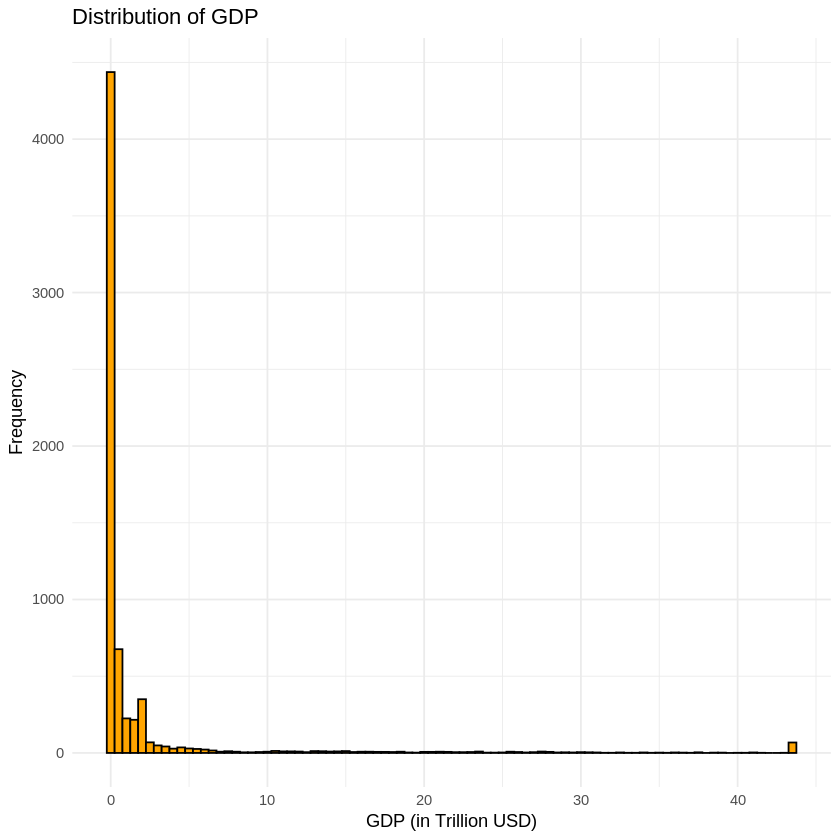

In [ ]:
# 2. Histogram: Distribution of GDP
# Convert GDP to trillions for better readability
data$gdp_trillion <- data$gdp / 1e12

ggplot(data, aes(x = gdp_trillion)) +
  geom_histogram(binwidth = 0.5, fill = "orange", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of GDP",
       x = "GDP (in Trillion USD)",
       y = "Frequency")

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


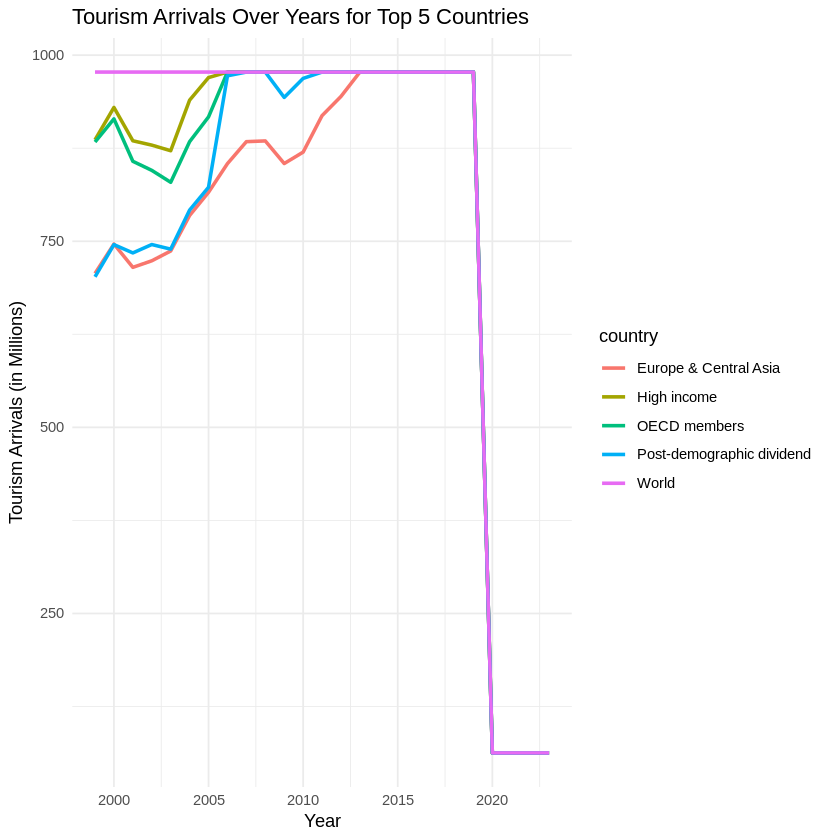

In [ ]:
# 3. Time Series Line Chart: Tourism Arrivals Over Years for Top 5 Countries
arrival_data <- data %>%
  group_by(country) %>%
  summarise(total_arrivals = sum(tourism_arrivals, na.rm = TRUE)) %>%
  arrange(desc(total_arrivals)) %>%
  slice_head(n = 5)  # Top 5 countries

top_countries <- arrival_data$country

time_series_data <- data %>%
  filter(country %in% top_countries) %>%
  group_by(country, year) %>%
  summarise(total_arrivals = sum(tourism_arrivals, na.rm = TRUE))

ggplot(time_series_data, aes(x = year, y = total_arrivals / 1e6, color = country, group = country)) +
  geom_line(size = 1) +
  theme_minimal() +
  labs(title = "Tourism Arrivals Over Years for Top 5 Countries",
       x = "Year",
       y = "Tourism Arrivals (in Millions)")

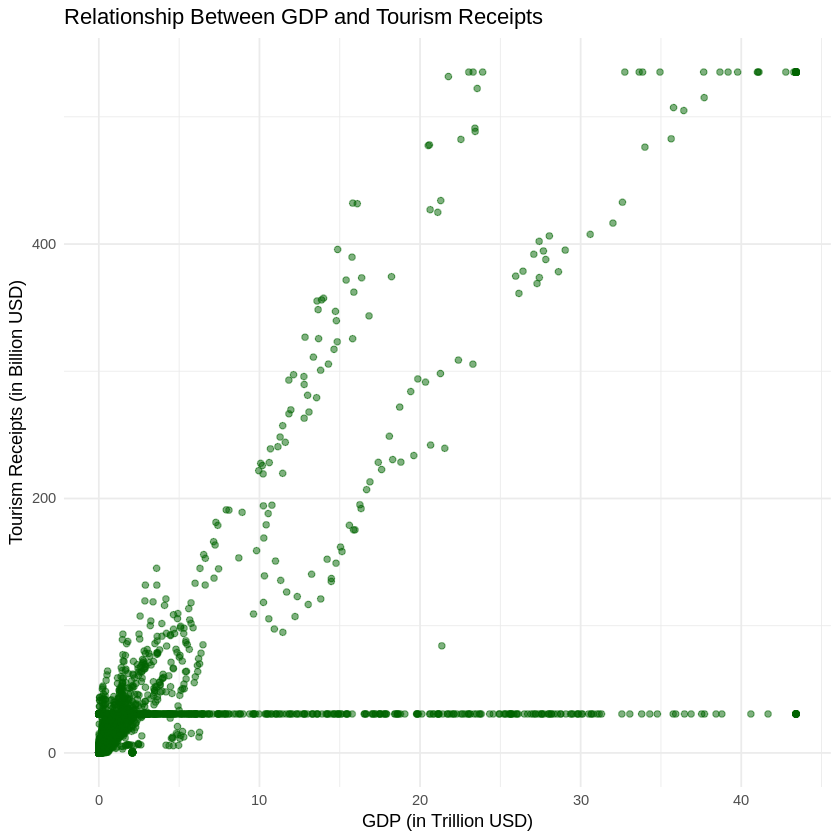

In [ ]:
# 4. Scatter Plot: Relationship Between GDP and Tourism Receipts
ggplot(data, aes(x = gdp / 1e12, y = tourism_receipts / 1e9)) +
  geom_point(alpha = 0.5, color = "darkgreen") +
  theme_minimal() +
  labs(title = "Relationship Between GDP and Tourism Receipts",
       x = "GDP (in Trillion USD)",
       y = "Tourism Receipts (in Billion USD)")

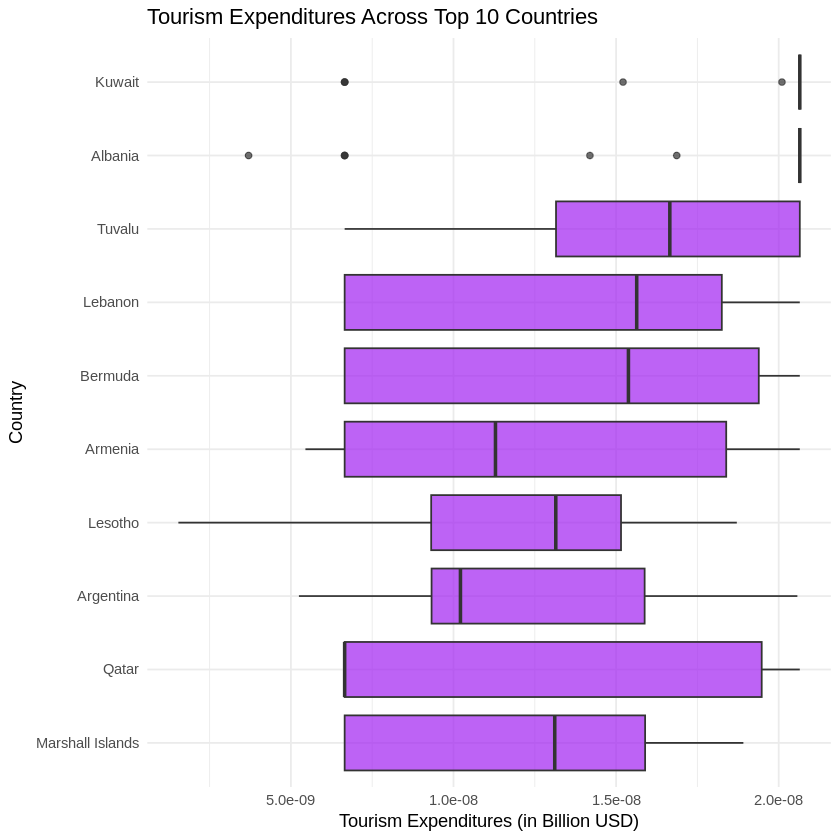

In [ ]:
# 5. Boxplot: Tourism Expenditures Across Different Countries
expenditure_data <- data %>%
  group_by(country) %>%
  summarise(total_expenditures = sum(tourism_expenditures, na.rm = TRUE)) %>%
  arrange(desc(total_expenditures)) %>%
  slice_head(n = 10)  # Top 10 countries

top_expenditure_countries <- expenditure_data$country

filtered_data <- data %>%
  filter(country %in% top_expenditure_countries)

ggplot(filtered_data, aes(x = reorder(country, tourism_expenditures), y = tourism_expenditures / 1e9)) +
  geom_boxplot(fill = "purple", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Tourism Expenditures Across Top 10 Countries",
       x = "Country",
       y = "Tourism Expenditures (in Billion USD)") +
  coord_flip()

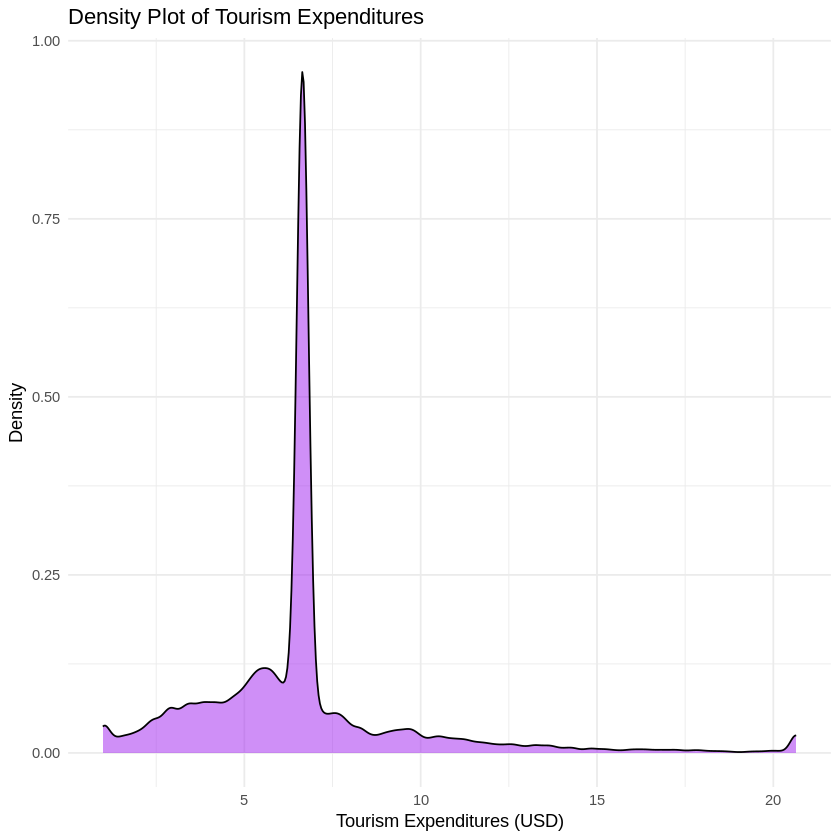

In [ ]:
ggplot(data, aes(x = tourism_expenditures)) +
  geom_density(fill = "purple", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Density Plot of Tourism Expenditures",
       x = "Tourism Expenditures (USD)",
       y = "Density")